# Kernelized Linear Classification Project

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp

In [2]:
dataset_pd = pd.read_csv('your_dataset.csv')
dataset = dataset_pd.to_numpy()
dataset_pd

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.205492,5.823226,98.837539,-1.075852,0.999205,0.911543,3.623558,-1.720267,-0.346191,-54.708330,-1
1,1.391530,3.611581,98.857197,-5.020318,0.677165,0.999492,3.413112,4.253865,2.041603,-54.317291,1
2,1.692571,-0.887019,100.901276,-0.595548,0.177550,-0.915495,4.320264,0.907834,3.126815,-56.397484,-1
3,4.289320,1.416843,100.784735,-2.897154,-0.066972,-0.786173,2.093003,1.336237,2.183829,-56.197728,1
4,0.542420,-1.010095,100.015580,-3.070705,0.088324,-0.242669,0.767942,-0.284683,-2.104145,-55.794045,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.481134,-0.572225,99.274788,-0.868047,-0.663229,0.572447,5.163238,1.765743,0.720265,-54.952233,-1
9996,0.047373,0.990198,100.444834,-0.707179,0.912113,-0.510397,1.128577,0.116130,-2.559018,-56.008656,-1
9997,1.741933,0.036304,100.524071,-0.113742,-0.761337,-0.728295,-1.334732,-1.312760,-0.442573,-56.170876,-1
9998,2.574986,0.041442,98.983735,-1.937883,0.983004,0.798133,5.847342,0.904038,-1.695064,-54.820699,1


In [3]:
class1 = np.count_nonzero(dataset == 1)
class2 = np.count_nonzero(dataset == -1)
print(f'Distribution of the binary class in the dataset:\n 1: {class1} , -1: {class2}')

Distribution of the binary class in the dataset:
 1: 4992 , -1: 5008


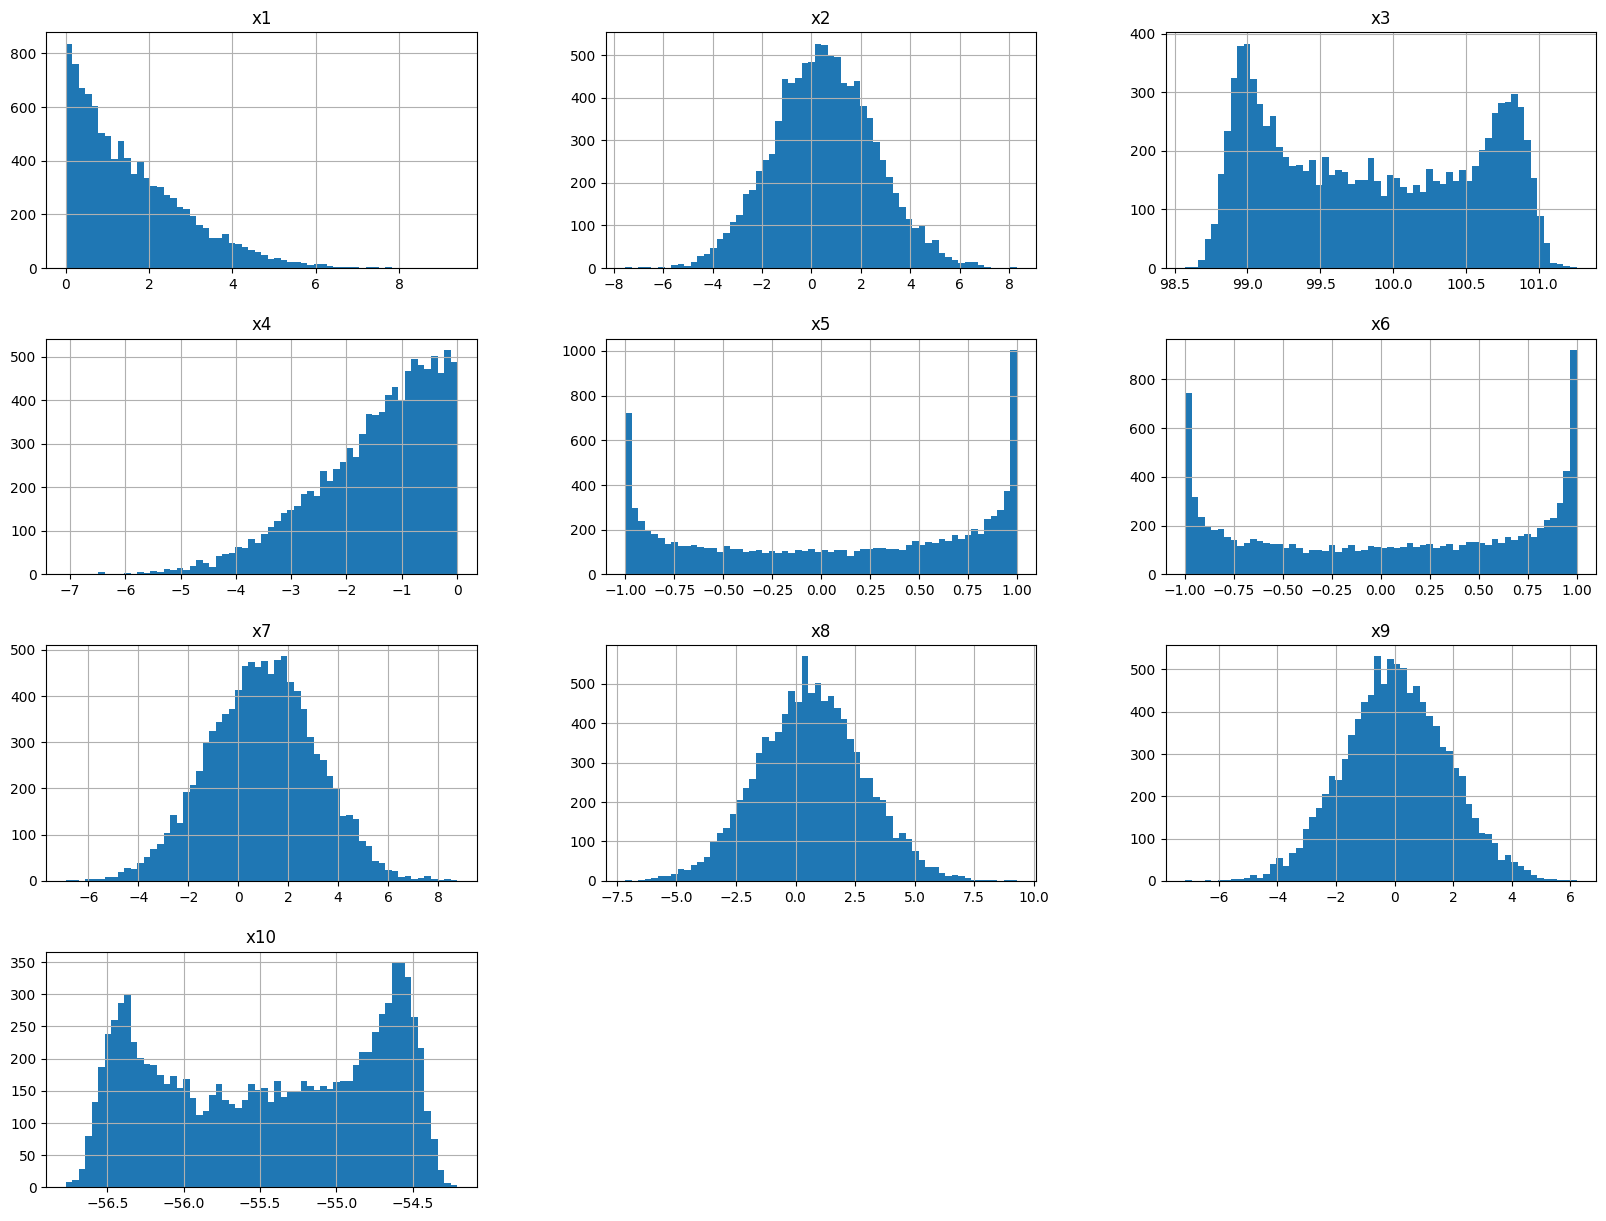

In [4]:
# Histogram of Features
dataset_pd.iloc[:, :-1].hist(bins=60, figsize=(20, 15))
plt.show()

## Preprocessing

In [5]:
# Seperating data points and labels
X = np.array([x[:-1] for x in dataset])
y = np.array([int(x[-1]) for x in dataset])

print(f'X: {X.shape[0]} samples and {X.shape[1]} features, y: {y.shape[0]} labels')

X: 10000 samples and 10 features, y: 10000 labels


In [6]:
# Split data points and label to training and test categories
def data_split(X, y, train_size=0.75):
    x_train = X[:int(train_size * len(X))]
    x_test = X[int(train_size * len(X)):]
    y_train = y[:int(train_size * len(y))]
    y_test = y[int(train_size * len(y)):]

    return x_train, x_test, y_train, y_test

# split data set to train and test samples
x_train, x_test, y_train, y_test = data_split(X, y, train_size=0.75)

x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((7500, 10), (2500, 10), (7500,), (2500,))

### Scaling Methods

In [7]:
def z_score(set_train, set_test):
    mean = np.mean(set_train, axis=0)
    std = np.std(set_train, axis=0)
    z_train = (set_train - mean) / std
    z_test = (set_test - mean) / std # scale test set with mean and standard deviation from training set
    return z_train, z_test

def min_max(set_train, set_test):
    minimum = np.min(set_train, axis=0)
    maximum = np.max(set_train, axis=0)
    return (set_train - minimum) / (maximum - minimum), (set_test - minimum) / (maximum - minimum) 
    

In [8]:
# Scale data
x_train_scaled, x_test_scaled = z_score(x_train, x_test)

## Testing

### Accuracy

In [9]:
def accuracy(y_test, y_pred):
    T = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            T += 1

    return 100 * T / len(y_test)

### Cross validation (K-fold)

In [10]:
def k_fold(data, k=5):
    fold_size = len(data) // 5
    indx = np.arange(len(data))
    folds= []

    for i in range(k):
        test_indx = indx[i * fold_size : (i+1) * fold_size] 
        train_indx = np.concatenate([indx[ : i * fold_size], indx[(i+1) * fold_size : ]])
        folds.append([train_indx, test_indx])

    return folds

# Make indicies for k-fold
k = 5
fold_indx = k_fold(dataset, k)
fold_indx

[[array([2000, 2001, 2002, ..., 9997, 9998, 9999]),
  array([   0,    1,    2, ..., 1997, 1998, 1999])],
 [array([   0,    1,    2, ..., 9997, 9998, 9999]),
  array([2000, 2001, 2002, ..., 3997, 3998, 3999])],
 [array([   0,    1,    2, ..., 9997, 9998, 9999]),
  array([4000, 4001, 4002, ..., 5997, 5998, 5999])],
 [array([   0,    1,    2, ..., 9997, 9998, 9999]),
  array([6000, 6001, 6002, ..., 7997, 7998, 7999])],
 [array([   0,    1,    2, ..., 7997, 7998, 7999]),
  array([8000, 8001, 8002, ..., 9997, 9998, 9999])]]

## Learning Algorithms

### Perceptron Algorithm

In [11]:
class Perceptron():
    def __init__(self, learn_rate=0.01, n_iters=1000):
        self.lr = learn_rate
        self.n_iters = n_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights
        self.w = np.zeros(n_features)

        # Training
        for _ in range(self.n_iters):
            for i, x in enumerate(X):
                y_predict = self.step(x @ self.w)

                # Updating
                if y_predict != y[i]:
                    self.w += self.lr * y[i] * x

    def step(self, x):
        return np.where(x > 0, 1, -1)

    def predict(self, x):
        y_predict = self.step(np.dot(x, self.w))
        return np.where(y_predict > 0, 1, -1)
    

In [53]:
# Initialize model
p = Perceptron(learn_rate=0.08, n_iters=30)

# Train the model
p.fit(x_train_scaled, y_train)

# Predict 
y_pred = p.predict(x_test_scaled)

# Measure Accuracy
accuracy(y_test, y_pred)

68.6

In [58]:
# Cross Validation
p = Perceptron(learn_rate=0.1, n_iters=30)

accuracies = []

for train, test in fold_indx:
    x_train, y_train = X[train], y[train]
    x_test, y_test = X[test], y[test]
    x_train_scaled, x_test_scaled = z_score(x_train, x_test)

    p.fit(x_train_scaled, y_train)
    y_pred = p.predict(x_test_scaled)
    accuracies.append(accuracy(y_test, y_pred))

print(accuracies)
sum(accuracies) / k

[68.65, 66.0, 62.1, 63.55, 68.6]


65.78

In [60]:
x = 10 * np.random.rand(10)
np.ones_like(x)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(654)

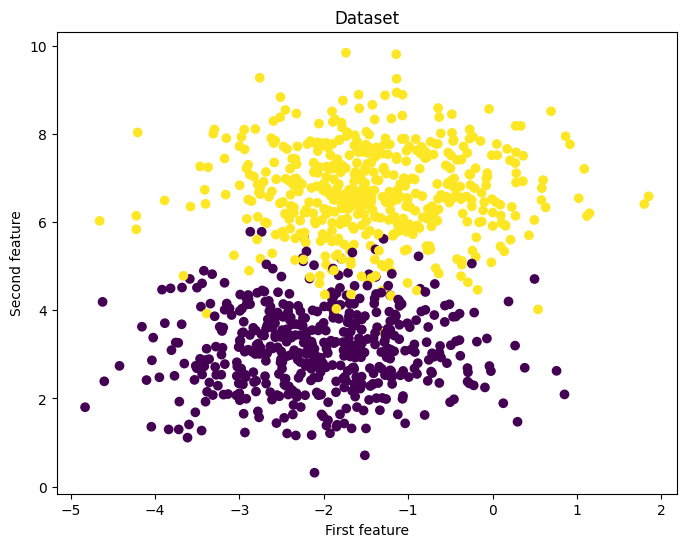

In [15]:
XX, yy = make_blobs(n_samples=1000, centers=2)
yy = np.where(yy > 0, 1, -1)
fig = plt.figure(figsize=(8,6))
plt.scatter(XX[:,0], XX[:,1], c=yy)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [16]:
y_true = yy[:, np.newaxis]

X_train, X_test, y_train, y_test = data_split(XX, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [17]:
p_test = Perceptron(n_iters=100)

x_train_scaled, x_test_scaled = z_score(X_train, X_test)

# Train the model
w, b = p_test.fit(X_train, y_train)

# predict 
y_pred = p_test.predict(X_test)

# Accuracy
accuracy(y_test, y_pred)

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,14,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.xlim(-5, 10)
    plt.ylim(-13, 5)
    plt.show()

plot_hyperplane(XX, yy, w, b)

### Support Vector Machines (SVMs) using the Pegasos Algorithm 

In [18]:
class SVMPegasos():
    def __init__(self, lambda_param=0.01, n_iters=1000):
        self.lambda_param = lambda_param
        self.n_iters = n_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights
        self.w = np.zeros(n_features)
        self.weight = np.zeros(n_features)

        # Training
        for t in range(1, self.n_iters + 1):
            eta = 1 / (self.lambda_param * t)
            i = random.randint(0, n_samples - 1)

            # Updating
            if y[i] * X[i] @ self.w < 1:
                self.w = (1 - 1/t) * self.w + (eta * y[i] * X[i])
                self.weight += self.w
            else:
                self.w = (1 - 1/t) * self.w
                self.weight += self.w

    def predict(self, x):
        weight = self.weight / self.n_iters
        return np.sign(x @ weight )
            

In [19]:
# Initialize model
svmp = SVMPegasos(n_iters=100000)

# Train model
svmp.fit(x_train_scaled, y_train)

# Predict
y_pred = svmp.predict(x_test_scaled)

# Measure Accuracy
accuracy(y_test, y_pred)

95.6

In [20]:
# Cross Validation
svmp = SVMPegasos(n_iters=100000)

accuracies = []

for train, test in fold_indx:
    x_train, y_train = X[train], y[train]
    x_test, y_test = X[test], y[test]
    x_train_scaled, x_test_scaled = z_score(x_train, x_test)

    svmp.fit(x_train_scaled, y_train)
    y_pred = svmp.predict(x_test_scaled)
    accuracies.append(accuracy(y_test, y_pred))

sum(accuracies) / k

72.49

### Regularized Logistic Classification

In [21]:
class PegasosLogistic():
    def __init__(self, lambda_param=0.01, n_iters=1000):
        self.lambda_param = lambda_param
        self.n_iters = n_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights
        self.w = np.zeros(n_features)

        # Training
        for t in range(1, self.n_iters+1):
            eta = 1 / (self.lambda_param * t)
            i = random.randint(0, n_samples-1)
            z = self.sigmoid(X[i] @ self.w)

            # Updating 
            if y[i] != z:
                self.w = (1 - 1/t) * self.w - (eta * (z - y[i]) * X[i])

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, x):
        z = self.sigmoid(x @ self.w)
        return np.where(z >= 0.5, 1, -1)
    

In [22]:
# Initialize model
pl = PegasosLogistic(n_iters=50000)

# Train model
pl.fit(x_train_scaled, y_train)

# Predict
y_pred = pl.predict(x_test_scaled)

# Measure accuracy
accuracy(y_test, y_pred)

71.05

In [23]:
# Cross Validation
pl = PegasosLogistic(n_iters=50000)

accuracies = []

for train, test in fold_indx:
    x_train, y_train = X[train], y[train]
    x_test, y_test = X[test], y[test]
    x_train_scaled, x_test_scaled = z_score(x_train, x_test)

    pl.fit(x_train_scaled, y_train)
    y_pred = pl.predict(x_test_scaled)
    accuracies.append(accuracy(y_test, y_pred))

sum(accuracies) / k

C:\Users\Asus\AppData\Local\Temp\ipykernel_26952\180497208.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


72.29

## Polynomial Feature Expansion of Algorithms

In [24]:
def polynomial_features_d2(X):
    n_samples, n_features = X.shape
    poly_features = []

    # Adding original features
    poly_features.append(X)

    # Adding the squared of the original features
    for i in range(n_features):
        poly_features.append(X[:, i:i+1] ** 2)

    # Adding all the combinations of multiplications between features
    for i in range(n_features):
        for j in range(i+1, n_features):
            poly_features.append(X[:, i:i+1] * X[:, j:j+1])
        
    return np.hstack(poly_features) 


In [25]:
# Expanding the original dataset features
poly_X = polynomial_features_d2(X)
print('Dimension of the dataset with polynomial feature expansion of degree 2:\n', poly_X.shape)

# Splitting train and test sets
x_train_poly, x_test_poly, y_train, y_test = data_split(poly_X, y, train_size=0.75)
print('Dimesions of training and test sets after feature expansion of degree 2:')
x_train_poly.shape, x_test_poly.shape, y_train.shape, y_test.shape 

Dimension of the dataset with polynomial feature expansion of degree 2:
 (10000, 65)
Dimesions of training and test sets after feature expansion of degree 2:


((7500, 65), (2500, 65), (7500,), (2500,))

In [26]:
# Scale data points with expanded features
x_train_poly_scaled, x_test_poly_scaled = z_score(x_train_poly, x_test_poly)

### Perceptron (Polynomial Features)

In [27]:
# Initialeze model
p_poly = Perceptron(learn_rate=0.1, n_iters=1500)

# Train the model
p_poly.fit(x_train_poly_scaled, y_train)

# predict 
y_pred = p_poly.predict(x_test_poly_scaled)

# Accuracy
accuracy(y_test, y_pred)

88.4

In [28]:
# Cross Validation
p_poly = Perceptron(learn_rate=0.1, n_iters=500)

accuracies = []

for train, test in fold_indx:
    x_train_poly, y_train = poly_X[train], y[train]
    x_test_poly, y_test = poly_X[test], y[test]
    x_train_poly_scaled, x_test_poly_scaled = z_score(x_train_poly, x_test_poly)

    p_poly.fit(x_train_poly_scaled, y_train)
    y_pred = p_poly.predict(x_test_poly_scaled)
    accuracies.append(accuracy(y_test, y_pred))

accuracies, sum(accuracies) / k

([86.95, 86.85, 87.25, 85.9, 89.2], 87.22999999999999)

### SVM Pegasos (Polynomial Features)

In [30]:
# Initialeze model
svm_poly = SVMPegasos(n_iters=40000)

# Train model
svm_poly.fit(x_train_poly_scaled, y_train)

# Predict
y_pred = svm_poly.predict(x_test_poly_scaled)

# Measure accuracy
accuracy(y_test, y_pred)

90.8

In [31]:
# Cross Validation
svm_poly = SVMPegasos(n_iters=40000)

accuracies = []

for train, test in fold_indx:
    x_train_poly, y_train = poly_X[train], y[train]
    x_test_poly, y_test = poly_X[test], y[test]
    x_train_poly_scaled, x_test_poly_scaled = z_score(x_train_poly, x_test_poly)

    svm_poly.fit(x_train_poly_scaled, y_train)
    y_pred = svm_poly.predict(x_test_poly_scaled)
    accuracies.append(accuracy(y_test, y_pred))

accuracies, sum(accuracies) / k

([90.15, 89.25, 89.35, 90.45, 90.9], 90.02000000000001)

### Regularized Logistic (Polynomial Features)

In [32]:
# Initialize model
pl_poly = PegasosLogistic(lambda_param=0.02, n_iters=10000)

# Train model
pl_poly.fit(x_train_poly_scaled, y_train)

# Predict
y_pred = pl_poly.predict(x_test_poly_scaled)

# Measure accuracy
accuracy(y_test, y_pred)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26952\180497208.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


78.75

In [33]:
# Cross Validation
pl_poly = PegasosLogistic(lambda_param=0.02, n_iters=10000)

accuracies = []

for train, test in fold_indx:
    x_train_poly, y_train = poly_X[train], y[train]
    x_test_poly, y_test = poly_X[test], y[test]
    x_train_poly_scaled, x_test_poly_scaled = z_score(x_train_poly, x_test_poly)

    pl_poly.fit(x_train_poly_scaled, y_train)
    y_pred = pl_poly.predict(x_test_poly_scaled)
    accuracies.append(accuracy(y_test, y_pred))

accuracies, sum(accuracies) / k

C:\Users\Asus\AppData\Local\Temp\ipykernel_26952\180497208.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


([79.5, 80.45, 79.15, 80.0, 79.4], 79.7)

## Algorithms using Kernel Methods

### Kernelized Perceptron

In [34]:
class PerceptronKernelized():
    def __init__(self, n_iters):
        self.n_iters = n_iters

    def polynomial_kernel(self, x1, x2, d=2, c=1):
        result = (x1 @ x2 + c) ** d
        return result

    def guassian_kernel(self, x1, x2, sigma=1):
        result = np.exp((-np.linalg.norm(x1 - x2) ** 2) / (2 * sigma ** 2))
        return result
    
    def fit_predict_poly(self, X, y, x_test):
        n_samples, n_features = X.shape
        self.S = []
        
        # Training
        for t in range(1, self.n_iters+1):
            
            for i in range(n_samples):
                y_pred = np.sign(sum(y[j] * self.polynomial_kernel(X[j], X[i]) for j in self.S))
                if y_pred != y[i]:
                    self.S.append(i)
                
        # Predict
        predict = []
        for x in x_test:
            ans = np.sign(sum(y[j] * self.polynomial_kernel(X[j], x) for j in self.S))
            predict.append(ans)

        return np.array(predict)


    def fit_predict_guassian(self, X, y, x_test):
        n_samples, n_features = X.shape
        self.S = []
        
        # Training
        for t in range(1, self.n_iters+1):
            
            for i in range(n_samples):
                y_pred = np.sign(sum(y[j] * self.guassian_kernel(X[j], X[i]) for j in self.S))
                if y_pred != y[i]:
                    self.S.append(i)
                
        # Predict
        predict = []
        for x in x_test:
            ans = np.sign(sum(y[j] * self.guassian_kernel(X[j], x) for j in self.S))
            predict.append(ans)

        return np.array(predict)


In [35]:
# Initializing model
pp_model = PerceptronKernelized(n_iters=1)

# Train model and predict
y_pred_poly = pp_model.fit_predict_poly(x_train_scaled, y_train, x_test_scaled)
y_pred_guassian = pp_model.fit_predict_guassian(x_train_scaled, y_train, x_test_scaled)

# Measure accuracy
accuracy(y_test, y_pred_poly), accuracy(y_test, y_pred_guassian)

(88.3, 90.85)

In [37]:
# Cross Validation
pp_model = PerceptronKernelized(n_iters=1)

accuracies_poly = []
accuracies_guassian = []

for train, test in fold_indx:
    x_train, y_train = X[train], y[train]
    x_test, y_test = X[test], y[test]
    x_train_scaled, x_test_scaled = z_score(x_train, x_test)

    y_pred_poly = pp_model.fit_predict_poly(x_train_scaled, y_train, x_test_scaled)    
    accuracies_poly.append(accuracy(y_test, y_pred_poly))

for train, test in fold_indx:
    x_train, y_train = X[train], y[train]
    x_test, y_test = X[test], y[test]
    x_train_scaled, x_test_scaled = z_score(x_train, x_test)

    y_pred_guassian = pp_model.fit_predict_guassian(x_train_scaled, y_train, x_test_scaled)    
    accuracies_guassian.append(accuracy(y_test, y_pred_guassian))

print(accuracies_poly, accuracies_guassian)
print(sum(accuracies_poly) / k, sum(accuracies_guassian) / k)

[90.3, 90.45, 90.2, 90.45, 88.3] [90.8, 90.25, 90.3, 89.65, 90.85]
89.94 90.37


### Kernelized SVM

In [38]:
class SVMKernelized():
    def __init__(self, n_iters=1000):
        self.n_iters = n_iters

    def polynomial_kernel(self, x1, x2, d=2, c=1):
        return (x1 @ x2 + c) ** d
    
    def guassian_kernel(self, x1, x2, sigma=1):
        return np.exp((-np.linalg.norm(x1 - x2) ** 2) / (2 * sigma ** 2))

    def fit_predict_polynomial(self, X, y, x_test):
        n_samples, n_features = X.shape
        self.S = []

        # Traininig
        for t in range(1, self.n_iters+1):
            i = random.randint(0, n_samples-1)
            pred = np.sign(sum(y[j] * self.polynomial_kernel(X[j], X[i]) for j in self.S))
            if y[i] != pred:
                self.S.append(i)

        # Predict
        predict = []        
        for x in x_test:
            ans = np.sign(sum(y[j] * self.polynomial_kernel(X[j], x) for j in self.S))
            predict.append(ans)

        return predict


    def fit_predict_guassian(self, X, y, x_test):
        n_samples, n_features = X.shape
        self.S = []

        # Training
        for t in range(1, self.n_iters+1):
            i = random.randint(0, n_samples-1)
            pred = np.sign(sum(y[j] * self.guassian_kernel(X[j], X[i]) for j in self.S))
            if y[i] != pred:
                self.S.append(i)

        # Predict
        predict = []        
        for x in x_test:
            ans = np.sign(sum(y[j] * self.guassian_kernel(X[j], x) for j in self.S))
            predict.append(ans)

        return predict


    def predict(self, x_test, X, y):
        predict = []        
        for x in x_test:
            ans = np.sign(sum(y[j] * self.polynomial_kernel(X[j], x) for j in self.S))
            predict.append(ans)

        return predict
        

In [39]:
# Initilizing model
sk_model = SVMKernelized(n_iters=6500)

# Train model and predict 
y_pred_poly = sk_model.fit_predict_polynomial(x_train_scaled, y_train, x_test_scaled)
y_pred_guassian = sk_model.fit_predict_guassian(x_train_scaled, y_train, x_test_scaled)

# Measure accuracy
accuracy(y_test, y_pred_poly), accuracy(y_test, y_pred_guassian)

(91.6, 89.45)

In [40]:
# Cross Validation
sk_model = SVMKernelized(n_iters=6500)

accuracies_poly = []
accuracies_guassian = []

for train, test in fold_indx:
    x_train, y_train = X[train], y[train]
    x_test, y_test = X[test], y[test]
    x_train_scaled, x_test_scaled = z_score(x_train, x_test)

    y_pred_poly = sk_model.fit_predict_polynomial(x_train_scaled, y_train, x_test_scaled)   
    accuracies_poly.append(accuracy(y_test, y_pred_poly))

for train, test in fold_indx:
    x_train, y_train = X[train], y[train]
    x_test, y_test = X[test], y[test]
    x_train_scaled, x_test_scaled = z_score(x_train, x_test)

    y_pred_guassian = sk_model.fit_predict_guassian(x_train_scaled, y_train, x_test_scaled)    
    accuracies_guassian.append(accuracy(y_test, y_pred_guassian))

print(accuracies_poly, accuracies_guassian)
print(sum(accuracies_poly) / k, sum(accuracies_guassian) / k)

[90.45, 89.8, 82.65, 90.7, 90.8] [89.15, 89.6, 90.95, 88.9, 89.0]
88.88 89.52000000000001
